# Plot of noise levels in the lens potential in wavelet space

__last update__: 11/05/22

In [1]:
%config InlineBackend.figure_format = 'retina'

import os
import copy
import numpy as np
import pickle as pkl
from astropy.io import fits
from scipy.optimize import minimize
import seaborn as sns # for nicer colors on the plot

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.colors import Normalize, LogNorm, ListedColormap, TwoSlopeNorm
from matplotlib import patches as mpatches
%matplotlib inline

plt.rc('image', interpolation='none', origin='lower')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"

from herculens.Util.plot_util import nice_colorbar, nice_colorbar_residuals

In [2]:
SAVE_FIGURES = True
figure_dir = 'figures'

In [9]:
# types of potential perturbations we consider
lens_pixel_scale_factor = 2
choice_idx = 0  # Starlet (0) or Battle-Lemarie (1)

with open(os.path.join('results', f'noise_pixpot_example-scale_{lens_pixel_scale_factor}-smooth_source.pkl'), 'rb') as f:
    noise_wavelet_maps = pkl.load(f)[choice_idx]

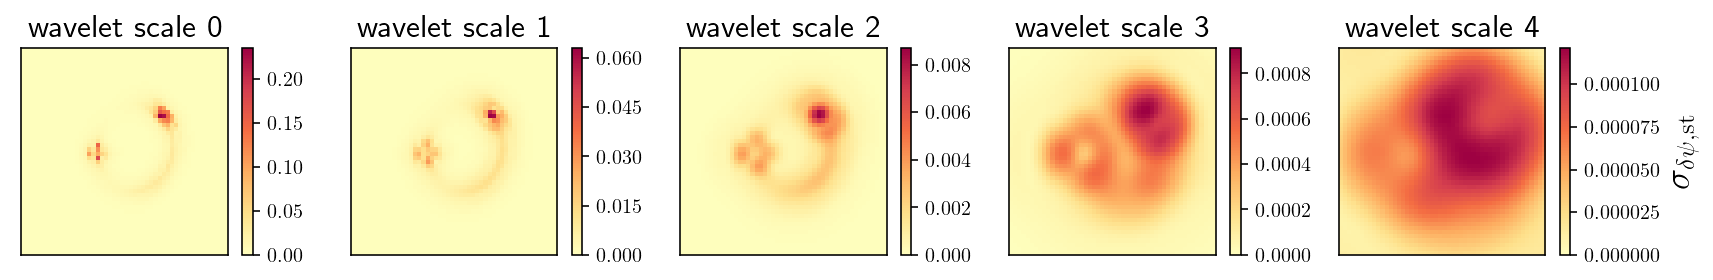

In [11]:
fontsize = 16

cmap = 'Spectral_r'

use_common_pot_vmax = False  # or None 
common_pot_vmax = 0.04

cb_pad = 0.1

num_scales = len(noise_wavelet_maps)-1
num_cols = num_scales
fig, axes = plt.subplots(1, num_cols, figsize=(12, 6))

# remove all ticks from axes
if num_scales > 1:
    for ax in axes.flatten():
        ax.set_xticks([])
        ax.set_yticks([])
else:
    axes.set_xticks([])
    axes.set_yticks([])
    
for k in range(num_scales):
    
    last_col = (k == num_scales-1)
    
    if num_scales > 1:
        ax = axes[k]
    else:
        ax = axes
    ax.set_title(f"wavelet scale {k}", fontsize=fontsize)
    im = ax.imshow(noise_wavelet_maps[k], norm=TwoSlopeNorm(0), cmap=cmap)
    im.set_rasterized(True)
    #label = r"$\boldsymbol{\psi}_{\rm pix}$ std dev." if last_col else None
    #label = r"${\rm diag}\,|\mathsf{C}_{\delta\psi,\rm st}|^{1/2}$" if last_col else None
    label = r"$\sigma_{\delta\psi,\rm st}$" if last_col else None
    cb = nice_colorbar(im, pad=cb_pad,  label=label, 
                       fontsize=fontsize+2, invisible=False)
    tick_locator = ticker.MaxNLocator(nbins=5)
    cb.locator = tick_locator
    cb.update_ticks()

#fig.subplots_adjust(hspace=0., wspace=0.4)
fig.tight_layout()
plt.show()

In [12]:
if SAVE_FIGURES:
    figure_name = 'noise_in_potential_wavelets.pdf'
    fig.savefig(os.path.join(figure_dir, figure_name), dpi=300, bbox_inches='tight', transparent=False)